# Part 3

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import random

### Binning real numbers

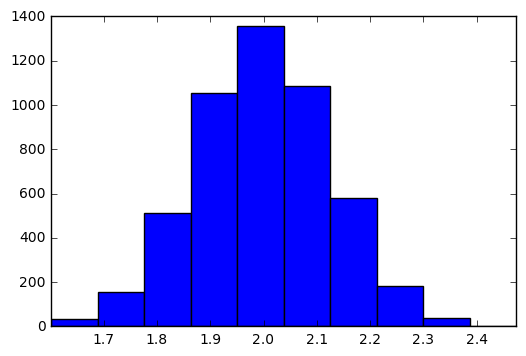

In [39]:
# Generate 50000 data points from a Gaussian distribution with mean = 2 and std = 0.125

mean = 2 # mean
sigma = 0.125 # standard deviation

x = np.random.normal(mean, sigma, 5000)

values,bin_edges = np.histogram(x,bins=10) 
# returns the values of the histogram and the bin edges
# The two arrays do not have the same length becaues the second array contains 
# the bin edges which specify on what interval each bin covers. 
# Therefore the first array contains 10 items but the second contains 11 items

# We handle that by leaving out the last element in the second array (the bin_edges array). 
# The reason being that the bin_edges array contains the range of each bin.
# For example the first bin range is the 1.579 - 1.673 (bin_edges[0] - bin_edges[1]). 
# So it is trivial to see that we do not need to includ the last element of the bin_edges array


plt.bar(bin_edges[:-1], values, width = bin_edges[1]-bin_edges[0])
plt.xlim(min(bin_edges), max(bin_edges))
plt.show()


### Binning integers

Minimum number of the poission distribution is 1
Maximum number of the poission distribution is 26


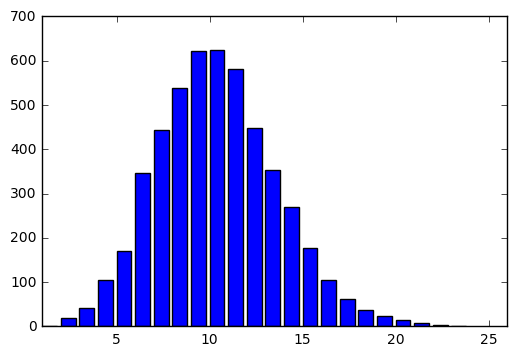

In [46]:
import collections

# Generate 5000 random numbers from poission distribution characterized by lambda = 10. 

poission_dist = np.random.poisson(10,5000)

# Find maximum and minimum value of the poission_dist
print "Minimum number of the poission distribution is {}".format(min(poission_dist))
print "Maximum number of the poission distribution is {}".format(max(poission_dist))

poission_dist_binned = { "bin_edges" : [], "values" : [] }

# Let´s bin these integer numbers from max to min, where each integer value gets its own bin
for number, value in collections.Counter(poission_dist).items():
    poission_dist_binned["bin_edges"].append(number)
    poission_dist_binned["values"].append(value)

plt.bar(poission_dist_binned["bin_edges"], poission_dist_binned["values"])
plt.xlim(min(poission_dist_binned["bin_edges"]), max(poission_dist_binned["bin_edges"]))
plt.show()


### Binning and plotting degree distribution
    
#### Notes
 - Erdös-Renyi (ER) is a random network model. Thats chapter three in the book
 - A random network consists of N nodes where each node pair is connected with probability p
     - To construct a random network we follow these steps:
         - Start with N isolated nodes
         - Select a node pair and generate a random number between 0 and 1. If the number exceeds p, connect the selected node pair with a link, otherwise leave them disconnected
         - Repeat step (2) for each of the N(N-1)/2 node pairs
- Key factor of random networks is that its properties are independent of the network size and depend on a single parameter, the average degree <k>

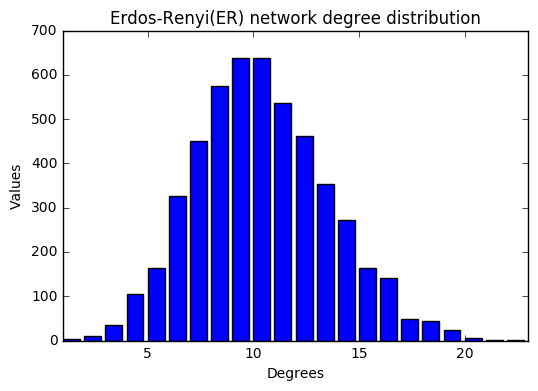

In [71]:
from __future__ import division

average_degree = 10
N = 5000

# First let´s generate the poission distribution
poission_dist = np.random.poisson(average_degree,N)

# calculating p by using equation 3.3 in the book
p = average_degree / (N - 1)

# Now lets use networkx to create the graph 
#   and extract the degree distribution

import networkx as nx
#G =  nx.fast_gnp_random_graph(5000,p)
G = nx.erdos_renyi_graph(N,p)

# Extract the average degree
degree_dist = G.degree().values()

degree_dist_binned = { "bin_edges" : [], "values" : [] }

# Let´s bin these integer numbers from max to min, where each integer value gets its own bin
for number, value in collections.Counter(degree_dist).items():
    degree_dist_binned["bin_edges"].append(number)
    degree_dist_binned["values"].append(value)

plt.bar(degree_dist_binned["bin_edges"], degree_dist_binned["values"])
plt.xlim(min(degree_dist_binned["bin_edges"]), max(degree_dist_binned["bin_edges"]))

plt.title("Erdos-Renyi(ER) network degree distribution")
plt.xlabel("Degrees")
plt.ylabel("Values")

plt.show()



# Part 4

### Exercise 3.1

See book for for answers - I did not complete this, I just did a) and b)

#### Paths

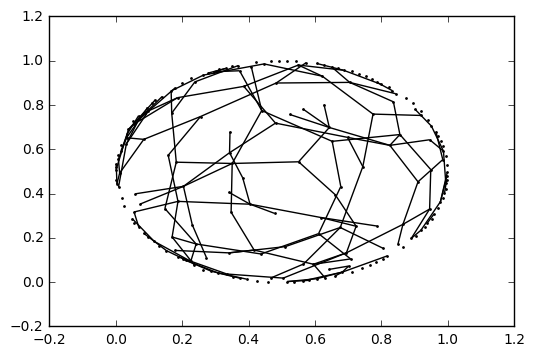

In [91]:
# The task in hand is to plot a random network with 200 nodes 
#  and average degree of 1.5

N = 200
average_degree = 1.5
p = average_degree / (N - 1)

# let´s create the graph
import networkx as nx
import matplotlib.pyplot as plt

G = nx.erdos_renyi_graph(N,p)


nx.draw_networkx(G,node_size = 1, with_labels = False)
plt.show()

There are 62 giant components in the network 

The number of nodes in the gcc is 112 

The node that was chosen randomly is 6 

All nodes that are previsely 2 steps away from 6 is [26, 43, 113, 131, 141, 146] 



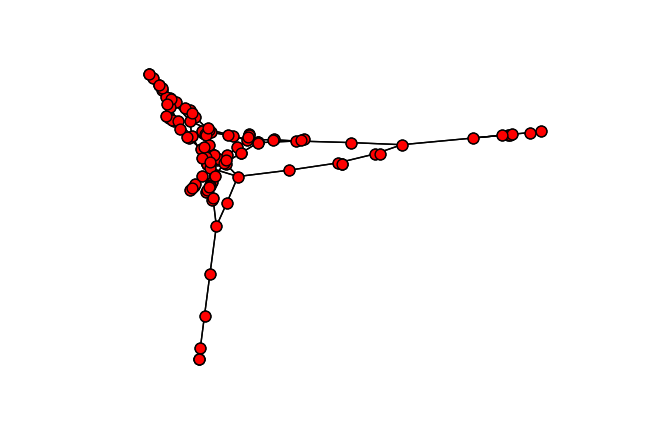

In [155]:
# Extract the Giant Connected Component, GCC
graphs = sorted(list(nx.connected_component_subgraphs(G)),key=lambda x: len(x.nodes()))
print "There are {} giant components in the network \n".format(len(graphs))

# Choose a node at random from the GCC
#   Hint: You may want to try random.choice

gcc = graphs[-1]
print "The number of nodes in the gcc is {} \n".format(len(gcc.nodes()))

# let's choose a node at random
gcc_node =  random.choice(gcc.nodes())
print "The node that was chosen randomly is {} \n".format(gcc_node)

# Find all nodes that are precisely 2 steps away for the node
shortest_paths =  nx.single_source_shortest_path_length(gcc, gcc_node)
shortest_paths_oflenght2 =  [node for node,length in shortest_paths.items() if length == 2]
print "All nodes that are previsely 2 steps away from {} is {} \n".format(gcc_node,shortest_paths_oflenght2)

# lets draw the graph with the first node black, the nodes 2 steps away red
#  and all other nodes blue

nx.draw_spectral(gcc,node_size = 60, with_labels = False)
plt.show()


All nodes that are previsely 2 steps away from 35 is [33, 54, 121, 154, 166, 179]


In [139]:
shortest_paths[54]

2